## Preprocessing

*Partially Adopted from https://github.com/btgraham/SparseConvNet/blob/kaggle_Diabetic_Retinopathy_competition/Data/kaggleDiabeticRetinopathy/preprocessImages.py*

1. Images are rescaled to have the same radius.
2. The local average color is subtracted
3. Images are clipped to 90% of the size.

In [31]:
import cv2, glob
import numpy as np
import matplotlib.pyplot as plt
from os.path import join, exists
from os import listdir, makedirs
%matplotlib inline

In [35]:
# partially from https://stackoverflow.com/questions/19471814/display-multiple-images-in-one-ipython-notebook-cell

def plot_images(images):
    plt.figure(figsize=(10, 10))
    columns = 2
    for i, image in enumerate(images):
        plt.subplot(len(images) / columns + 1, columns, i + 1)
        plt.imshow(image)

###  Radius Scaling

In [36]:
def scaleRadius(img,scale):
    x=img[img.shape[0]//2,:,:].sum(1)
    r=(x>x.mean()/10).sum()/2
    s=scale*1.0/r
    return cv2.resize(img,(0,0),fx=s,fy=s)

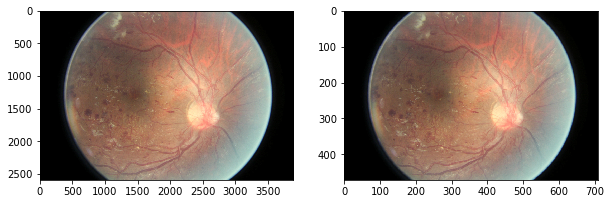

In [49]:
read_path = join('sample', '16_left.jpeg')
scale = 300
img = cv2.imread(read_path)
img2 = scaleRadius(img, scale)

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

plot_images([img, img2])

### Mean subtraction and Clipping

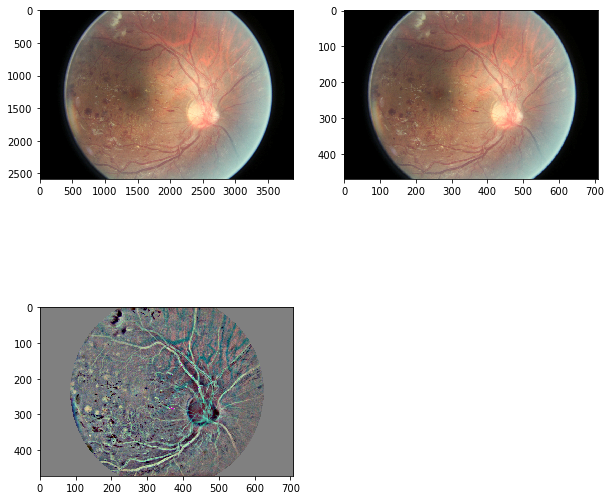

In [50]:
read_path = join('sample', '16_left.jpeg')
scale = 300

img = cv2.imread(read_path)
img2 = scaleRadius(img, scale)

b = np.zeros(img2.shape)
cv2.circle(b,(img2.shape[1]//2,img2.shape[0]//2),int(scale*0.9),(1,1,1),-1,8,0)
img3 = cv2.addWeighted(img2,4,cv2.GaussianBlur(img2,(0,0),scale/30),-4,128)*b+128*(1-b)



img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
img3 = cv2.cvtColor(np.float32(img3), cv2.COLOR_BGR2RGB)
plot_images([img, img2, img3])

### Complete Function to process folder of images

In [3]:
def preprocess(folder='sample', scales=[300], save_path_same=True, target_size=(0,0)):
        
    for scale in scales:
        if (save_path_same):
            write_folder = folder+'_'+str(scale)
        else:
            write_folder = 'processed_'+str(scale)
        
        if not exists(write_folder):
            makedirs(write_folder)
            
        for f in listdir(folder):
            try:
                read_path = join(folder, f)
                a = cv2.imread(read_path)
                a = scaleRadius(a,scale)
                b = np.zeros(a.shape)
                cv2.circle(b,(a.shape[1]//2,a.shape[0]//2),int(scale*0.9),(1,1,1),-1,8,0)
                aa = cv2.addWeighted(a,4,cv2.GaussianBlur(a,(0,0),scale/30),-4,128)*b+128*(1-b)
                if (target_size != (0,0)):
                    aa = cv2.resize(aa, target_size)
                boo = cv2.imwrite(join(write_folder, f), aa)

                print("Processed Image: ", f)
                print("Save Location: ", join(write_folder, f))
                print("Success: ", boo)
                print("New Dimensions: ", aa.shape[0], " X ", aa.shape[1])
                print("______________________________________________\n")
                
            except:
                print("Could not process file: ", f)


In [4]:
preprocess('sample')

Processed Image:  16_left.jpeg
Save Location:  sample_300/16_left.jpeg
Success:  True
New Dimensions:  472  X  709
______________________________________________

Processed Image:  15_left.jpeg
Save Location:  sample_300/15_left.jpeg
Success:  True
New Dimensions:  614  X  927
______________________________________________

Processed Image:  13_left.jpeg
Save Location:  sample_300/13_left.jpeg
Success:  True
New Dimensions:  575  X  767
______________________________________________

Processed Image:  10_left.jpeg
Save Location:  sample_300/10_left.jpeg
Success:  True
New Dimensions:  632  X  948
______________________________________________

Processed Image:  10_right.jpeg
Save Location:  sample_300/10_right.jpeg
Success:  True
New Dimensions:  632  X  948
______________________________________________

Processed Image:  17_left.jpeg
Save Location:  sample_300/17_left.jpeg
Success:  True
New Dimensions:  630  X  945
______________________________________________

Processed Image:  16